# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

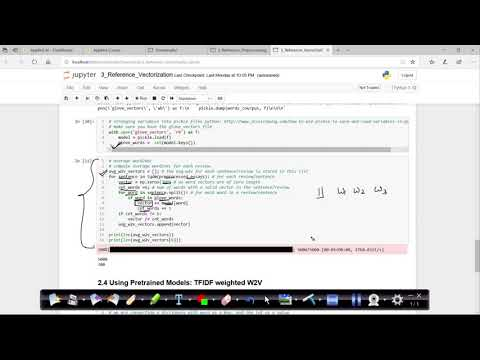

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re

import pickle
from tqdm import tqdm
import os

import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [3]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [4]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mayek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [7]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas as pd
data = pd.read_csv('preprocessed_data.csv')

In [8]:
data.head(2)

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  clean_categories                 clean_subcategories  \
0     math_science  appliedsciences health_lifescience   
1     specialneeds                        specialneeds   

                                               essay   price  
0  i fortunate enough use fairy tale stem kits cl...  725.05  
1  imagine 8 9 years old you third grade classroo...  213.03

In [9]:
data.shape

(109248, 9)

In [10]:
preprocessed_essays = data['essay'].values

In [11]:
y = data['project_is_approved'].values

In [12]:
x = data.drop(['project_is_approved'], axis = 1)

## Sampling data into train, cross validation and test: stratified sampling

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify = y, random_state = 15)

In [15]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(76473, 8) (76473,)
(32775, 8) (32775,)


## SET-I (TASK 1)

### 1.1_tfidf vector respresentation of text feature "essay"

In [16]:
tfidf_vectorizer = TfidfVectorizer(min_df = 10, ngram_range= (1,4), max_features = 5000)
tfidf_vectorizer.fit(x_train['essay'].values)

TfidfVectorizer(max_features=5000, min_df=10, ngram_range=(1, 4))

In [17]:
x_train_essay_tfidf = tfidf_vectorizer.transform(x_train['essay'].values)
x_test_essay_tfidf = tfidf_vectorizer.transform(x_test['essay'].values)

In [18]:
print(x_train_essay_tfidf.shape, y_train.shape)
print(x_test_essay_tfidf.shape, y_test.shape)

(76473, 5000) (76473,)
(32775, 5000) (32775,)


### 1.2_tfidf vector respresentation of categorical feature "school_state"

In [19]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(x_train['school_state'].values)

TfidfVectorizer()

In [20]:
x_train_ss_tfidf = tfidf_vectorizer.transform(x_train['school_state'].values)
x_test_ss_tfidf = tfidf_vectorizer.transform(x_test['school_state'].values)

In [21]:
print(x_train_ss_tfidf.shape, y_train.shape)
print(x_test_ss_tfidf.shape, y_test.shape)

(76473, 51) (76473,)
(32775, 51) (32775,)


### 1.3_tfidf vector respresentation of categorical feature "teacher_prefix"

In [22]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(x_train['teacher_prefix'].values)

TfidfVectorizer()

In [23]:
x_train_tp_tfidf = tfidf_vectorizer.transform(x_train['teacher_prefix'].values)
x_test_tp_tfidf = tfidf_vectorizer.transform(x_test['teacher_prefix'].values)

In [24]:
print(x_train_tp_tfidf.shape, y_train.shape)
print(x_test_tp_tfidf.shape, y_test.shape)

(76473, 5) (76473,)
(32775, 5) (32775,)


### 1.4_tfidf vector respresentation of categorical feature "project_grade_catogery"

In [25]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(x_train['project_grade_category'].values)

TfidfVectorizer()

In [26]:
x_train_grade_tfidf = tfidf_vectorizer.transform(x_train['project_grade_category'].values)
x_test_grade_tfidf = tfidf_vectorizer.transform(x_test['project_grade_category'].values)

In [27]:
print(x_train_grade_tfidf.shape, y_train.shape)
print(x_test_grade_tfidf.shape, y_test.shape)

(76473, 4) (76473,)
(32775, 4) (32775,)


### 1.5_tfidf vector respresentation of categorical feature "clean_catogeries"

In [28]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(x_train['clean_categories'].values)

TfidfVectorizer()

In [29]:
x_train_cleancat_tfidf = tfidf_vectorizer.transform(x_train['clean_categories'].values)
x_test_cleancat_tfidf = tfidf_vectorizer.transform(x_test['clean_categories'].values)

In [30]:
print(x_train_cleancat_tfidf.shape, y_train.shape)
print(x_test_cleancat_tfidf.shape, y_test.shape)

(76473, 9) (76473,)
(32775, 9) (32775,)


### 1.6_tfidf vector respresentation of categorical feature "clean_subcatogeries"

In [31]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(x_train['clean_subcategories'].values)

TfidfVectorizer()

In [32]:
x_train_subcat_tfidf = tfidf_vectorizer.transform(x_train['clean_subcategories'].values)
x_test_subcat_tfidf = tfidf_vectorizer.transform(x_test['clean_subcategories'].values)

In [33]:
print(x_train_subcat_tfidf.shape, y_train.shape)
print(x_test_subcat_tfidf.shape, y_test.shape)

(76473, 30) (76473,)
(32775, 30) (32775,)


### 1.7_performing normalization on numerical feature :  "price"

In [34]:
from sklearn.preprocessing import Normalizer

In [35]:
normalizer = Normalizer()

In [36]:
normalizer.fit(x_train['price'].values.reshape(-1,1))

Normalizer()

In [37]:
x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(-1,1))
x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1,1))

In [38]:
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)

(76473, 1) (76473,)
(32775, 1) (32775,)


### 1.8_performing normalization on numerical feature : "teacher_number_of_previously_posted_projects"

In [39]:
normalizer = Normalizer()

In [40]:
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

Normalizer()

In [41]:
x_train_teacher_pre_projects = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_teacher_pre_projects = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

In [42]:
print(x_train_teacher_pre_projects.shape, y_train.shape)
print(x_test_teacher_pre_projects.shape, y_test.shape)

(76473, 1) (76473,)
(32775, 1) (32775,)


In [43]:
print(type(x_train['teacher_number_of_previously_posted_projects']))

<class 'pandas.core.series.Series'>


### 1.9_Computing Sentiment Scores for Train, CV and Test data

In [44]:
def sentiment_scores(x):
    sentiment_scores = []
    sid = SentimentIntensityAnalyzer()
    for i in x:
        ss = sid.polarity_scores(i)
        sentiment_scores.append(ss)

    negative_scores = []
    neutral_scores = []
    positive_scores = []
    compound_scores = []
    for m in sentiment_scores :
        for k,v in m.items():
            if k == 'neg':
                negative_scores.append(v)
            elif k == 'neu':
                neutral_scores.append(v)
            elif k == 'pos':
                positive_scores.append(v)
            elif k == 'compound':
                compound_scores.append(v)
                
    return np.array(negative_scores), np.array(neutral_scores), np.array(positive_scores), np.array(compound_scores)
    
    

In [45]:
xtr_negative_scores, xtr_neutral_scores, xtr_positive_scores, xtr_compound_scores = sentiment_scores(x_train['essay'].values)
xte_negative_scores, xte_neutral_scores, xte_positive_scores, xte_compound_scores = sentiment_scores(x_test['essay'].values)

### 1.9.1_performing normalization on numerical feature :  "negative scores"

In [46]:
normalizer = Normalizer()

In [47]:
normalizer.fit((xtr_negative_scores).reshape(-1,1))

Normalizer()

In [48]:
x_train_essay_negative_scores = normalizer.transform((xtr_negative_scores).reshape(-1,1))
x_test_essay_negative_scores = normalizer.transform((xte_negative_scores).reshape(-1,1))

### 1.9.2_performing normalization on numerical feature :  "neutral scores"

In [49]:
normalizer = Normalizer()

In [50]:
normalizer.fit((xtr_neutral_scores).reshape(-1,1))

Normalizer()

In [51]:
x_train_essay_neutral_scores = normalizer.transform((xtr_neutral_scores).reshape(-1,1))
x_test_essay_neutral_scores = normalizer.transform((xte_neutral_scores).reshape(-1,1))

### 1.9.3_performing normalization on numerical feature :  "positive scores"

In [52]:
normalizer = Normalizer()

In [53]:
normalizer.fit((xtr_positive_scores).reshape(-1,1))

Normalizer()

In [54]:
x_train_essay_positive_scores = normalizer.transform((xtr_positive_scores).reshape(-1,1))
x_test_essay_positive_scores = normalizer.transform((xte_positive_scores).reshape(-1,1))

### 1.9.4_performing normalization on numerical feature :  "compound scores"

In [55]:
normalizer = Normalizer()

In [56]:
normalizer.fit((xtr_compound_scores).reshape(-1,1))

Normalizer()

In [57]:
x_train_essay_compound_scores = normalizer.transform((xtr_compound_scores).reshape(-1,1))
x_test_essay_compound_scores = normalizer.transform((xte_compound_scores).reshape(-1,1))

In [58]:
print(x_train_essay_negative_scores.shape, x_train_essay_neutral_scores.shape, x_train_essay_positive_scores.shape, x_train_essay_compound_scores.shape)
print(x_test_essay_negative_scores.shape, x_test_essay_neutral_scores.shape, x_test_essay_positive_scores.shape, x_test_essay_compound_scores.shape)

(76473, 1) (76473, 1) (76473, 1) (76473, 1)
(32775, 1) (32775, 1) (32775, 1) (32775, 1)


### Concatinating all the features

In [59]:
from scipy.sparse import hstack

In [60]:
x_train_s1 = hstack((x_train_essay_tfidf, x_train_ss_tfidf, x_train_tp_tfidf, x_train_grade_tfidf, x_train_cleancat_tfidf, x_train_subcat_tfidf, x_train_price_norm, x_train_teacher_pre_projects, x_train_essay_negative_scores, x_train_essay_neutral_scores, x_train_essay_positive_scores, x_train_essay_compound_scores)).tocsr()
x_test_s1 = hstack((x_test_essay_tfidf, x_test_ss_tfidf, x_test_tp_tfidf, x_test_grade_tfidf, x_test_cleancat_tfidf, x_test_subcat_tfidf, x_test_price_norm, x_test_teacher_pre_projects, x_test_essay_negative_scores, x_test_essay_neutral_scores, x_test_essay_positive_scores, x_test_essay_compound_scores)).tocsr()

In [61]:
print('Final Data Matrix:')
print(x_train_s1.shape, y_train.shape)
print(x_test_s1.shape, y_test.shape)

Final Data Matrix:
(76473, 5105) (76473,)
(32775, 5105) (32775,)


## Applying Decision Tree: TFIDF Featurization

### Hyper Parameter Tuning

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

In [63]:
decision_tree = DecisionTreeClassifier()
parameters = {'max_depth':  [1, 3, 10, 30], 'min_samples_split': [5, 10, 100, 500]}

clf_s1 = GridSearchCV(decision_tree, parameters, cv=10, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf_s1.fit(x_train_s1, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [64]:
results = pd.DataFrame.from_dict(clf_s1.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std = results['std_test_score']

In [65]:
print('Best Parameters:' , clf_s1.best_params_)
print('Best Score:' , clf_s1.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 500}
Best Score: 0.6265761299770359


In [66]:
best_depth = clf_s1.best_params_['max_depth']
best_samples_split = clf_s1.best_params_['min_samples_split']

### Representation of results using 3D scatter plot

In [67]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt

In [68]:
min_samples_split = [5, 10, 100, 500]
max_depth = [1,3,10,30]

In [69]:
trace1 = go.Scatter3d(x=min_samples_split,y=max_depth,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=min_samples_split,y=max_depth,z=cv_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()

## Training the model on best hyperparameters

In [70]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
        
    if data.shape[0]%1000 != 0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
        
    return y_data_pred

In [71]:
model_s1 = DecisionTreeClassifier(max_depth = best_depth, min_samples_split = best_samples_split, random_state = 15)

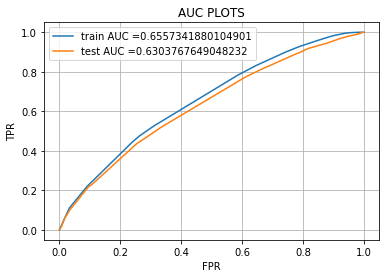

In [72]:
model_s1.fit(x_train_s1, y_train)

y_train_pred = batch_predict(model_s1, x_train_s1)
y_test_pred = batch_predict(model_s1, x_test_s1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC PLOTS')
plt.grid()
plt.show()

## Best threshold value

In [73]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print('the maximum value of tpr*(1-fpr)', max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t


def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i >= threshold:
            predictions.append(1)
        else:
            predictions.append(0)
            
    return predictions

In [74]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.36257686317386406 for threshold 0.857


## Plotting confusion matrix

Train Confusion Matrix:
[[ 7990  3589]
 [30796 34098]]


<AxesSubplot:>

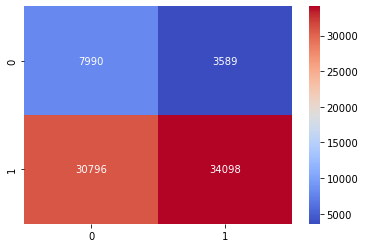

In [75]:
from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:")
cf_matrix_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(cf_matrix_train)
sns.heatmap(cf_matrix_train, annot=True, fmt= "", cmap='coolwarm')
#https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#:~:text=You%20need%20to%20create%20a,matrix%20with%20the%20labels%20annotation.

Test Confusion Matrix:
[[ 3300  1663]
 [13340 14472]]


<AxesSubplot:>

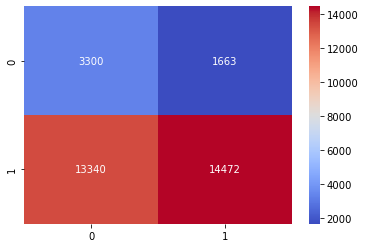

In [76]:
print("Test Confusion Matrix:")
cf_matrix_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(cf_matrix_test)
sns.heatmap(cf_matrix_test, annot=True, fmt= "", cmap='coolwarm')

## Getting all the false positive data points and plotting wordcloud of it

In [77]:
false_positives = []
for m, (i, j) in enumerate(zip(y_test, predict_with_best_t(y_test_pred, best_t))):
    if i == 0 and j == 1:
        false_positives.append(m)     

In [78]:
# creating a dataframe of only false positive data points
df_false_positives_test = pd.DataFrame(x_test.iloc[false_positives], columns = x_test.columns)

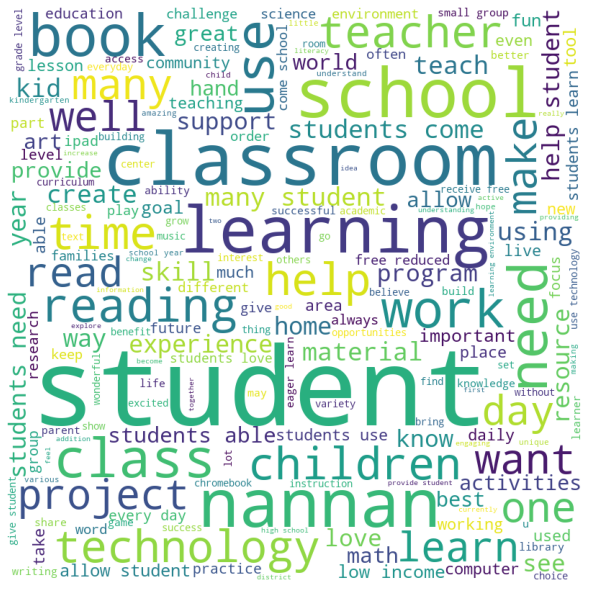

In [79]:
from wordcloud import WordCloud, STOPWORDS
 
 
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df_false_positives_test['essay']:
     
    val = str(val)
    
    tokens = val.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                   
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# https://www.geeksforgeeks.org/generating-word-cloud-python/

## Box plot of feature 'price' of false positive data points

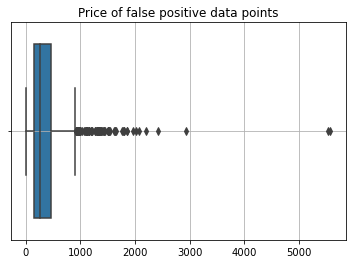

In [80]:
sns.boxplot(x= df_false_positives_test['price'].values, data=df_false_positives_test)
plt.title('Price of false positive data points')
plt.grid()
plt.show()

## pdf of 'teacher_number_of_previously_posted_projects' of false positive data points

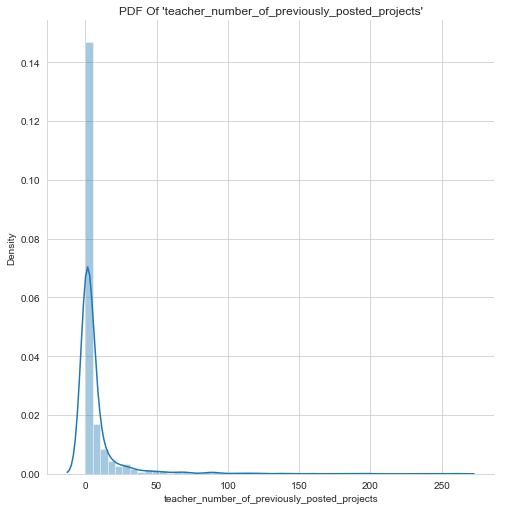

In [81]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_false_positives_test, size=7)
a.map(sns.distplot, 'teacher_number_of_previously_posted_projects')
a.add_legend()
plt.title("PDF Of 'teacher_number_of_previously_posted_projects'")
plt.show()

## SET-I (TASK 2)

## Getting all the important features

In [82]:
clf_non_zero_fe = DecisionTreeClassifier(max_depth = None, min_samples_split = best_samples_split, random_state = 15)

In [83]:
clf_non_zero_fe.fit(x_train_s1, y_train)

DecisionTreeClassifier(min_samples_split=500, random_state=15)

In [84]:
feature_values = clf_non_zero_fe.feature_importances_

In [85]:
feature_values

array([0.        , 0.        , 0.00020326, ..., 0.        , 0.        ,
       0.        ])

In [86]:
important_features = []
for i in range(len(feature_values)):
    if feature_values[i] > 0:
        important_features.append(i)
        

## Applying Decision Tree: on most important features

### Hyper Parameter Tuning

In [87]:
decision_tree = DecisionTreeClassifier()
parameters = {'max_depth':  [1, 3, 10, 30], 'min_samples_split': [5, 10, 100, 500]}

clf_s1_1 = GridSearchCV(decision_tree, parameters, cv=10, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf_s1_1.fit(x_train_s1[:,important_features] , y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [88]:
results = pd.DataFrame.from_dict(clf_s1_1.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std = results['std_test_score']

In [89]:
print('Best Parameters:' , clf_s1_1.best_params_)
print('Best Score:' , clf_s1_1.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 500}
Best Score: 0.6295545363659263


In [90]:
best_depth = clf_s1_1.best_params_['max_depth']
best_samples_split = clf_s1_1.best_params_['min_samples_split']

### Representation of results using 3D scatter plot

In [91]:
min_samples_split = [5, 10, 100, 500]
max_depth = [1,3,10,30]

In [92]:
trace1 = go.Scatter3d(x=min_samples_split,y=max_depth,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=min_samples_split,y=max_depth,z=cv_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()

## Training the model on best hyperparameters

In [93]:
model_s1_1 = DecisionTreeClassifier(max_depth = best_depth, min_samples_split = best_samples_split, random_state = 15)

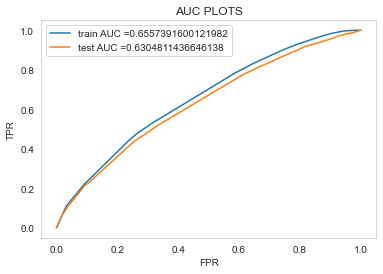

In [94]:
model_s1_1.fit(x_train_s1[:,important_features] , y_train)

y_train_pred = batch_predict(model_s1_1, x_train_s1[:,important_features])
y_test_pred = batch_predict(model_s1_1, x_test_s1[:,important_features])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC PLOTS')
plt.grid()
plt.show()

## Best threshold value

In [95]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.36257686317386406 for threshold 0.857


## Plotting confusion matrix

Train Confusion Matrix:
[[ 7990  3589]
 [30796 34098]]


<AxesSubplot:>

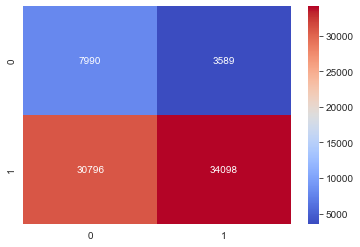

In [96]:
from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:")
cf_matrix_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(cf_matrix_train)
sns.heatmap(cf_matrix_train, annot=True, fmt= "", cmap='coolwarm')

Test Confusion Matrix:
[[ 3300  1663]
 [13337 14475]]


<AxesSubplot:>

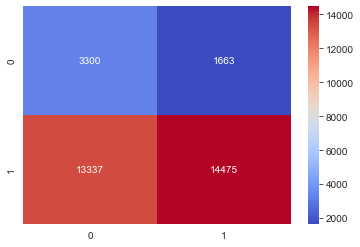

In [97]:
print("Test Confusion Matrix:")
cf_matrix_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(cf_matrix_test)
sns.heatmap(cf_matrix_test, annot=True, fmt= "", cmap='coolwarm')

## Getting all the false positive data points and plotting wordcloud of it

In [98]:
false_positives = []
for m, (i, j) in enumerate(zip(y_test, predict_with_best_t(y_test_pred, best_t))):
    if i == 0 and j == 1:
        false_positives.append(m)     

In [99]:
# creating a dataframe of only false positive data points
df_false_positives_test = pd.DataFrame(x_test.iloc[false_positives], columns = x_test.columns)

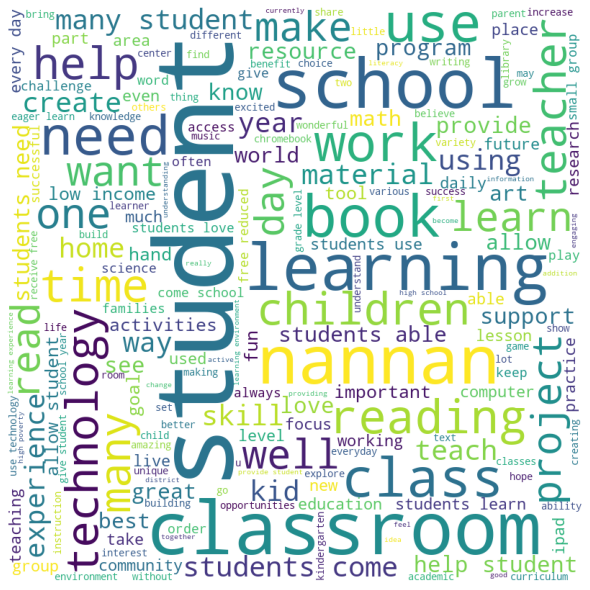

In [100]:
from wordcloud import WordCloud, STOPWORDS
 
 
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df_false_positives_test['essay']:
     
    val = str(val)
    
    tokens = val.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                   
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Box plot of feature 'price' of false positive data points

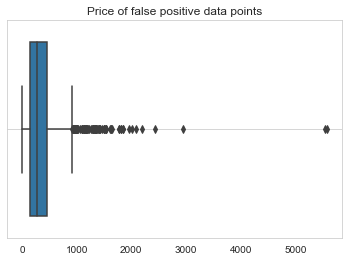

In [101]:
sns.boxplot(x= df_false_positives_test['price'].values, data=df_false_positives_test)
plt.title('Price of false positive data points')
plt.grid()
plt.show()

## pdf of 'teacher_number_of_previously_posted_projects' of false positive data points

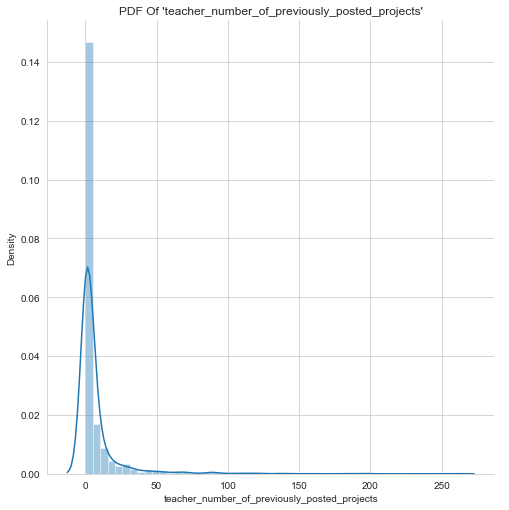

In [102]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_false_positives_test, size=7)
a.map(sns.distplot, 'teacher_number_of_previously_posted_projects')
a.add_legend()
plt.title("PDF Of 'teacher_number_of_previously_posted_projects'")
plt.show()

## SET - II (TASK-1)

### 2.1_tfidf vector respresentation of text feature "essay"

In [103]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [104]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 76473/76473 [02:06<00:00, 605.14it/s]

76473
300


In [105]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 32775/32775 [00:52<00:00, 624.70it/s]

32775
300


In [106]:
tfidf_w2v_vectors_train = np.array(tfidf_w2v_vectors_train)
tfidf_w2v_vectors_test = np.array(tfidf_w2v_vectors_test)

In [107]:
print(tfidf_w2v_vectors_train.shape, y_train.shape)
print(tfidf_w2v_vectors_test.shape, y_test.shape)

(76473, 300) (76473,)
(32775, 300) (32775,)


### Concatinating all the features

In [108]:
x_train_s2 = hstack((tfidf_w2v_vectors_train, x_train_ss_tfidf, x_train_tp_tfidf, x_train_grade_tfidf, x_train_cleancat_tfidf, x_train_subcat_tfidf, x_train_price_norm, x_train_teacher_pre_projects, x_train_essay_negative_scores, x_train_essay_neutral_scores, x_train_essay_positive_scores, x_train_essay_compound_scores)).tocsr()
x_test_s2 = hstack((tfidf_w2v_vectors_test, x_test_ss_tfidf, x_test_tp_tfidf, x_test_grade_tfidf, x_test_cleancat_tfidf, x_test_subcat_tfidf, x_test_price_norm, x_test_teacher_pre_projects, x_test_essay_negative_scores, x_test_essay_neutral_scores, x_test_essay_positive_scores, x_test_essay_compound_scores)).tocsr()

## Applying Decision Tree: TFIDF W2V Featurization

### Hyper Parameter Tuning

In [109]:
decision_tree = DecisionTreeClassifier()
parameters = {'max_depth':  [1, 3, 10, 30], 'min_samples_split': [5, 10, 100, 500]}

clf_s2 = GridSearchCV(decision_tree, parameters, cv=10, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf_s2.fit(x_train_s2, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [110]:
results = pd.DataFrame.from_dict(clf_s2.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std = results['std_test_score']

In [111]:
print('Best Parameters:' , clf_s1.best_params_)
print('Best Score:' , clf_s1.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 500}
Best Score: 0.6265761299770359


In [112]:
best_depth = clf_s1.best_params_['max_depth']
best_samples_split = clf_s1.best_params_['min_samples_split']

### Representation of results using 3D scatter plot

In [113]:
min_samples_split = [5, 10, 100, 500]
max_depth = [1,3,10,30]

In [114]:
trace1 = go.Scatter3d(x=min_samples_split,y=max_depth,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=min_samples_split,y=max_depth,z=cv_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()

## Training the model on best hyperparameters

In [115]:
model_s2 = DecisionTreeClassifier(max_depth = best_depth, min_samples_split = best_samples_split, random_state = 15)

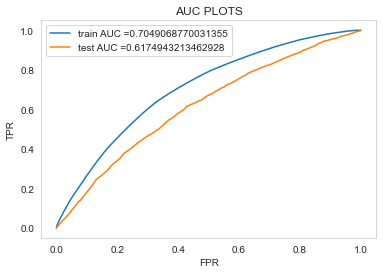

In [116]:
model_s2.fit(x_train_s2, y_train)

y_train_pred = batch_predict(model_s2, x_train_s2)
y_test_pred = batch_predict(model_s2, x_test_s2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC PLOTS')
plt.grid()
plt.show()

## Best threshold value

In [117]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.42901560064816274 for threshold 0.852


## Plotting confusion matrix

Train Confusion Matrix:
[[ 7507  4072]
 [21952 42942]]


<AxesSubplot:>

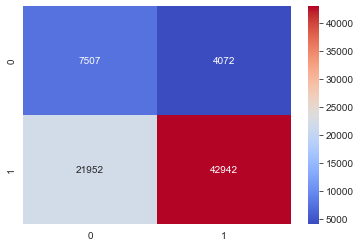

In [118]:
from sklearn.metrics import confusion_matrix
print("Train Confusion Matrix:")
cf_matrix_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(cf_matrix_train)
sns.heatmap(cf_matrix_train, annot=True, fmt= "", cmap='coolwarm')

Test Confusion Matrix:
[[ 2645  2318]
 [ 9968 17844]]


<AxesSubplot:>

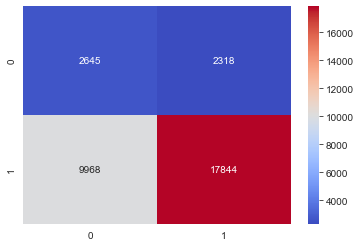

In [119]:
print("Test Confusion Matrix:")
cf_matrix_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(cf_matrix_test)
sns.heatmap(cf_matrix_test, annot=True, fmt= "", cmap='coolwarm')

## Getting all the false positive data points and plotting wordcloud of it

In [120]:
false_positives = []
for m, (i, j) in enumerate(zip(y_test, predict_with_best_t(y_test_pred, best_t))):
    if i == 0 and j == 1:
        false_positives.append(m)   

In [121]:
df_false_positives_test = pd.DataFrame(x_test.iloc[false_positives], columns = x_test.columns)

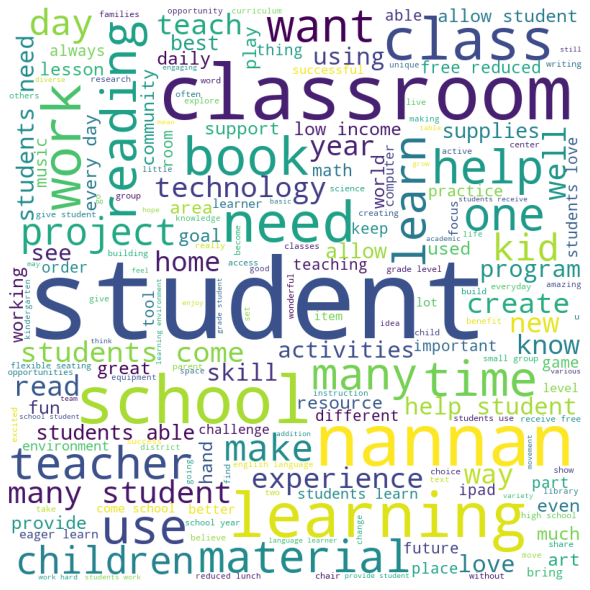

In [122]:
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df_false_positives_test['essay']:
     
    val = str(val)
    
    tokens = val.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                   
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Box plot of feature 'price' of false positive data points

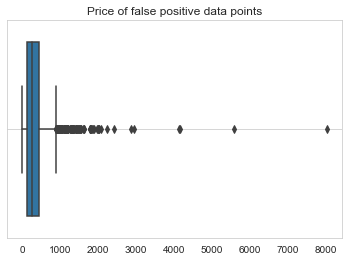

In [123]:
sns.boxplot(x= df_false_positives_test['price'].values, data=df_false_positives_test)
plt.title('Price of false positive data points')
plt.grid()
plt.show()

## pdf of 'teacher_number_of_previously_posted_projects' of false positive data points

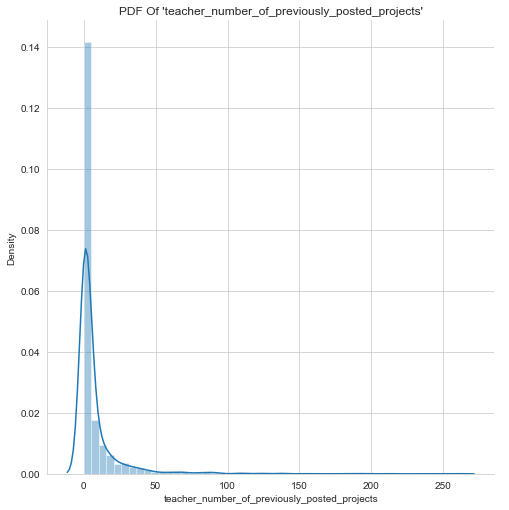

In [124]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_false_positives_test, size=7)
a.map(sns.distplot, 'teacher_number_of_previously_posted_projects')
a.add_legend()
plt.title("PDF Of 'teacher_number_of_previously_posted_projects'")
plt.show()

## SUMMERY

In [126]:
from prettytable import PrettyTable
summery =PrettyTable()
summery.field_names = ["Vectorizer", "Model", "Hyper Parameter_1(max_depth)","Hyper Parameter_2(min_samples_split)", "AUC"]
summery.add_row(["TFIDF", "DECISION TREE", 10 , 500 , 0.630])
summery.add_row(["TFIDF ON NON ZERO FEATURES", "DECISION TREE", 10, 500, 0.630])
summery.add_row(["TFIDF W2V", "DECISION TREE", 10, 500, 0.617])
print(summery)
#https://pypi.org/project/prettytable/

+----------------------------+---------------+------------------------------+--------------------------------------+-------+
|         Vectorizer         |     Model     | Hyper Parameter_1(max_depth) | Hyper Parameter_2(min_samples_split) |  AUC  |
+----------------------------+---------------+------------------------------+--------------------------------------+-------+
|           TFIDF            | DECISION TREE |              10              |                 500                  |  0.63 |
| TFIDF ON NON ZERO FEATURES | DECISION TREE |              10              |                 500                  |  0.63 |
|         TFIDF W2V          | DECISION TREE |              10              |                 500                  | 0.617 |
+----------------------------+---------------+------------------------------+--------------------------------------+-------+
